# Data Cleaning: Normalization
The purpose of this notebook is to describe the steps taken to clean the given dataset. It starts by normalizing any variation or meaning of the words, <font color='red'>requirement</font> and <font color='red'>process notes</font>. Such variations are deliniated in subsequent sections. Essentially, the steps involve multiple searches and manually-replaces of the variations, thus changing the content of the raw data. There are two points that worth noticing here:

1. The raw data in *Job Bulletins* remains intact while cleaned data were generated in a new folder caled *JobBulletins_cleaned*.
2. Admittedly, the steps taken here are extremely labor-intensive. However, this was done for a purpose as I learned that it is the best way to get myself familiarized with unstructured data. In particular, **since the source that generated these text file is not known**, we really have no idea on how to retrieve relevant information based on matched pattern. For example, one might attempt to do something such as `job[job.find('REQUIREMENTS/MINIMUM QUALIFICATIONS':job.find('PROCESS NOTES')]` or any similar expressions using regex. Although that this statement may help him retrieve **only** relevant information regarding school type, education majors, etc., this is not guranteed! For instance, I found that in some jobs, the word, PROCESS NOTES, came after the word WHERE TO APPLY, which unarguably causes severe headache later. The only way to avoid this, as far as I realize, is to patiently do some manual data cleaning before any analysis.

<font size=4, color='green'> LET'S GET STARTED! </font>

In [31]:
# Import relevant modules
import os                       # interface with the underlying OS
import numpy as np              # linear algebra
import pandas as pd             # dataframe
import re                       # regular expression
import matplotlib.pyplot as plt # data visualization
%matplotlib inline

In [18]:
# Define path to look at
path = 'CityofLA/Job Bulletins/'

# Get a list of all txt files in this path
all_jobs = os.listdir(path)
all_jobs.sort() # WARNING: this mutates the list

In [19]:
# Do some checks here
print(len(all_jobs))      # length should be 683 as manually verified
print(len(set(all_jobs))) # see if each file is unique. hopefully 683 as well!
print('SYSTEMS ANALYST 1596 102717.txt' in all_jobs) # should be True

683
683
True


## 1. Normalize variation of the word/meaning of `requirement` as 
## `REQUIREMENTS/MINIMUM QUALIFICATIONS`
Some variations that I found:
* REQUIREMENT
* REQUIREMENTS
* REQUIREMENT/ MINIMUM QUALIFICATION
* REQUIREMENT/MINIMUM QUALIFICATIONS
* REQUIREMENTS/MINIMUM QUALIFICATIONS
* REQUIREMENT:
* REQUIREMENTS:

Note that they can also come with any combination of redundant whitespaces!

Let's start with `SYSTEMS ANALYST 1596 102717.txt` to see what approach will work, since we've known so well about it.

In [20]:
# Find `SYSTEMS ANALYST 1596 102717.txt` (which exists).
print(all_jobs.index('SYSTEMS ANALYST 1596 102717.txt'))

609


In [21]:
# Import this text as string
sa_path = path + all_jobs[609]
sa = open(sa_path, 'rt').read()

In [22]:
# Compare these
print('REQUIREMENTS/MINIMUM QUALIFICATIONS' in sa)
print('REQUIREMENTS' in sa)
print()

# Versus these
print()
print('REQUIREMENTS/MINIMUM QUALIFICATIONS' in sa.split('\n'))
print('REQUIREMENTS' in sa.split('\n'))

True
True


True
False


The "Compare these" part can't do an exact lookup; <font size=5, color='red'>thus, well pick the approach in the "Versus these" part.</font>

**Identify the trouble makers, Round 1.**

Save the printouts to a word file called, *TroubleMakers_Type1_1*.

In [24]:
# When I did this at home, it has some UnicodeDecodeError (look at my physical copy)
# But when I did this from the computer at school, it didn't. Hmmm...
for file_name in all_jobs:
    # Find path
    job_path = path + file_name
    # Read in job as string based on job_path
    job      = open(job_path, 'rt').read()
    # Verify if 'REQUIREMENTS/MINIMUM QUALIFICATIONS' in job
    if 'REQUIREMENTS/MINIMUM QUALIFICATIONS' not in job.split('\n'):
        print(job_path)

CityofLA/Job Bulletins/311 DIRECTOR  9206 041814.txt
CityofLA/Job Bulletins/ACCOUNTANT 1513 062218.txt
CityofLA/Job Bulletins/ACCOUNTING CLERK 1223 071318.txt
CityofLA/Job Bulletins/ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt
CityofLA/Job Bulletins/ADMINISTRATIVE CLERK 1358 033018 (2).txt
CityofLA/Job Bulletins/ADMINISTRATIVE HEARING EXAMINER 9135 100915.txt
CityofLA/Job Bulletins/ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE 2325 020808 REV 111214.txt
CityofLA/Job Bulletins/AIR CONDITIONING MECHANIC SUPERVISOR 3781 111618 2.txt
CityofLA/Job Bulletins/AIRPORT AIDE 1540 081018.txt
CityofLA/Job Bulletins/AIRPORT CHIEF INFORMATION SECURITY OFFICER 1404 120415_Modified.txt
CityofLA/Job Bulletins/AIRPORT ENGINEER 7256 070618.txt
CityofLA/Job Bulletins/AIRPORT GUIDE 0845 042018.txt
CityofLA/Job Bulletins/AIRPORT INFORMATION SPECIALIST 1783 121115.txt
CityofLA/Job Bulletins/AIRPORT POLICE CAPTAIN 3228 021618.txt
CityofLA/Job Bulletins/AIRPORT POLICE LIEUTENANT 3227 091616.txt
CityofLA/Job Bul

**Identify trouble maker, Round 2.**

Save the printouts to a word file called, *TroubleMakers_Type1_2*.

In [25]:
# Define path to look at
path = 'CityofLA/JobBulletins_cleaned/'

# Get a list of all txt files in this path
all_jobs = os.listdir(path)
all_jobs.sort() # WARNING: this mutates the list

for file_name in all_jobs:
    # Find path
    job_path = path + file_name
    # Read in job as string based on job_path
    job      = open(job_path, 'rt').read()
    # Verify if 'REQUIREMENTS/MINIMUM QUALIFICATIONS' in job
    if 'REQUIREMENTS/MINIMUM QUALIFICATIONS' not in job.split('\n'):
        print(job_path)

CityofLA/JobBulletins_cleaned/CHIEF INTERNAL AUDITOR 1619 090916 (5).txt
CityofLA/JobBulletins_cleaned/GRAPHICS SUPERVISOR 7935 052617 (4).txt
CityofLA/JobBulletins_cleaned/POLICE COMMANDER 2251 092917.txt
CityofLA/JobBulletins_cleaned/POLICE DETECTIVE 2223 033018.txt
CityofLA/JobBulletins_cleaned/POLICE OFFICER 2214 110906 Rev 060115.txt
CityofLA/JobBulletins_cleaned/POLICE PERFORMANCE AUDITOR 1627 120216.txt
CityofLA/JobBulletins_cleaned/POLICE SERGEANT 2227 102116.txt
CityofLA/JobBulletins_cleaned/POLICE SERVICE REPRESENTATIVE 2207 051316 REV 051716.txt
CityofLA/JobBulletins_cleaned/POLICE SPECIAL INVESTIGATOR 1640 072018 REV 011019.txt
CityofLA/JobBulletins_cleaned/POLICE SPECIALIST 2217 110906 Rev 060115.txt
CityofLA/JobBulletins_cleaned/POLICE SURVEILLANCE SPECIALIST 3687 052215.txt
CityofLA/JobBulletins_cleaned/POLYGRAPH EXAMINER 2240 121517.txt
CityofLA/JobBulletins_cleaned/PORT ELECTRICAL MECHANIC 3758 022616.txt
CityofLA/JobBulletins_cleaned/PORT ELECTRICAL MECHANIC SUPERVISO

**Identify trouble makers, Round 3.**

In [26]:
# Define path to look at
path = 'CityofLA/JobBulletins_cleaned/'

# Get a list of all txt files in this path
all_jobs = os.listdir(path)
all_jobs.sort() # WARNING: this mutates the list

for file_name in all_jobs:
    # Find path
    job_path = path + file_name
    # Read in job as string based on job_path
    job      = open(job_path, 'rt').read()
    # Verify if 'REQUIREMENTS/MINIMUM QUALIFICATIONS' in job
    if 'REQUIREMENTS/MINIMUM QUALIFICATIONS' not in job.split('\n'):
        print(job_path)

CityofLA/JobBulletins_cleaned/Vocational Worker  DEPARTMENT OF PUBLIC WORKS.txt


<font size=5, color='red'> Well done!</font>

Note that the job above follow a completely different format from the rest, so for now, we'll ignore it.

## 2. Normalize `PROCESS NOTES`
Some variations that were found:
* PROCESS NOTES
* PROCESS NOTES:
* NOTES
* NOTES:
* NOTE
* NOTE:
* Sometimes missing completely. Ex: `POLICE OFFICER 2214 110906 Rev 060115.txt`
* Most of the times this key come before WHERE TO APPLY, but there are ocassions it comes after. Ex: `CHIEF CLERK POLICE 1219 061215.txt`
And with no exception :(, they can come with any combination of redundant whitespaces.

In [27]:
# First, take a look at how this is done with sa
print('PROCESS NOTES' in sa.split('\n'))
print('PROCESS' in sa.split('\n'))

True
False


It seems good. Thus, we'll stick to this approach.

**Identify the trouble makers, Round 1.**

Save the printouts to a word file called, *TroubleMakers_Type2_1*.

In [28]:
# Define path to look at
path = 'CityofLA/JobBulletins_cleaned/'

# Get a list of all txt files in this path
all_jobs = os.listdir(path)
all_jobs.sort() # WARNING: this mutates the list

for file_name in all_jobs:
    # Find path
    job_path = path + file_name
    # Read in job as string based on job_path
    job      = open(job_path, 'rt').read()
    # Verify if 'REQUIREMENTS/MINIMUM QUALIFICATIONS' in job
    if 'PROCESS NOTES' not in job.split('\n'):
        print(job_path)

CityofLA/JobBulletins_cleaned/311 DIRECTOR  9206 041814.txt
CityofLA/JobBulletins_cleaned/ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt
CityofLA/JobBulletins_cleaned/ADMINISTRATIVE HEARING EXAMINER 9135 100915.txt
CityofLA/JobBulletins_cleaned/ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE 2325 020808 REV 111214.txt
CityofLA/JobBulletins_cleaned/AIRPORT AIDE 1540 081018.txt
CityofLA/JobBulletins_cleaned/AIRPORT CHIEF INFORMATION SECURITY OFFICER 1404 120415_Modified.txt
CityofLA/JobBulletins_cleaned/AIRPORT GUIDE 0845 042018.txt
CityofLA/JobBulletins_cleaned/AIRPORT INFORMATION SPECIALIST 1783 121115.txt
CityofLA/JobBulletins_cleaned/AIRPORT POLICE OFFICER 3225 110906 Rev 060115.txt
CityofLA/JobBulletins_cleaned/AIRPORT POLICE SPECIALIST 3236 063017 (2).txt
CityofLA/JobBulletins_cleaned/AIRPORT SUPERINTENDENT OF OPERATIONS 7268 121815 (1).txt
CityofLA/JobBulletins_cleaned/ANIMAL CARE ASSISTANT 4323 020119.txt
CityofLA/JobBulletins_cleaned/ANIMAL CARE TECHNICIAN 4310 040116 REV 041416.txt


**Identify the trouble makers, Round 2.**

Save the printouts to a word file called, *TroubleMakers_Type2_2*.

In [29]:
# Define path to look at
path = 'CityofLA/JobBulletins_cleaned/'

# Get a list of all txt files in this path
all_jobs = os.listdir(path)
all_jobs.sort() # WARNING: this mutates the list

for file_name in all_jobs:
    # Find path
    job_path = path + file_name
    # Read in job as string based on job_path
    job      = open(job_path, 'rt').read()
    # Verify if 'REQUIREMENTS/MINIMUM QUALIFICATIONS' in job
    if 'PROCESS NOTES' not in job.split('\n'):
        print(job_path)

CityofLA/JobBulletins_cleaned/ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt
CityofLA/JobBulletins_cleaned/AIRPORT AIDE 1540 081018.txt
CityofLA/JobBulletins_cleaned/MECHANICAL REPAIR GENERAL SUPERVISOR 3731 040116 REV 041416.txt
CityofLA/JobBulletins_cleaned/REFUSE CREW FIELD INSTRUCTOR 4100 081216.txt
CityofLA/JobBulletins_cleaned/Vocational Worker  DEPARTMENT OF PUBLIC WORKS.txt


**Identify the trouble makers, Round 2.**

In [30]:
# Define path to look at
path = 'CityofLA/JobBulletins_cleaned/'

# Get a list of all txt files in this path
all_jobs = os.listdir(path)
all_jobs.sort() # WARNING: this mutates the list

for file_name in all_jobs:
    # Find path
    job_path = path + file_name
    # Read in job as string based on job_path
    job      = open(job_path, 'rt').read()
    # Verify if 'REQUIREMENTS/MINIMUM QUALIFICATIONS' in job
    if 'PROCESS NOTES' not in job.split('\n'):
        print(job_path)

CityofLA/JobBulletins_cleaned/Vocational Worker  DEPARTMENT OF PUBLIC WORKS.txt


<font size=5, color='red'> Well done!</font>

Again, note that the job above follow a completely different format from the rest, so for now, we'll ignore it.

## 3. Normalize the order
Most of the jobs have the following order of sections: REQUIREMENTS/MINIMUM QUALIFICATIONS, PROCESS NOTES, WHERE TO APPLY, etc. However, as mentioned in the openning of this notebook, some jobs mess this up: REQUIREMENTS/MINIMUM QUALIFICATIONS, WHERE TO APPLY, PROCESS NOTES, or any incorrect order that we don't know yet. Thus, we need to fix this.

Fortunately, we can use a histogram to plot the distributions of the length of extracted texts between REQUIREMENTS/MINIMUM QUALIFICATIONS and PROCESS NOTES. Of course, a removal of `Vocational Worker  DEPARTMENT OF PUBLIC WORKS.txt` is first needed.

In [36]:
# Remove `Vocational Worker  DEPARTMENT OF PUBLIC WORKS.txt` 
# as it doesn't share the same job description pattern of the City of LA
all_jobs.remove('Vocational Worker  DEPARTMENT OF PUBLIC WORKS.txt')

# Sanity double check
print('Vocational Worker  DEPARTMENT OF PUBLIC WORKS.txt' in all_jobs) # should be True
print(len(all_jobs)) # should be 682

False
682


In [43]:
# Histogram of length of extracted texts between two key words
length_of_extracted_txts = [] # container that holds all strings' lengths

for file_name in all_jobs:
     # Find path
    job_path = path + file_name
    # Read in job as string based on job_path
    job      = open(job_path, 'rt').read()
    # Use index, not find as a last-ditched attempt to catch any error
    txt      = job[job.index('REQUIREMENTS/MINIMUM QUALIFICATIONS'):job.index('PROCESS NOTES')]
    # Append length to the list
    length_of_extracted_txts.append(len(txt))

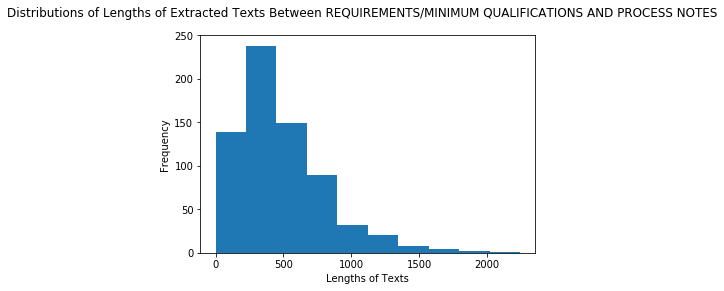

In [55]:
plt.hist(length_of_extracted_txts)
plt.suptitle('Distributions of Lengths of Extracted Texts' + 
          ' Between REQUIREMENTS/MINIMUM QUALIFICATIONS AND PROCESS NOTES')
plt.xlabel('Lengths of Texts')
plt.ylabel('Frequency')
plt.show()

Oops! Looks like we have quite a few jobs with the order of sections messed up. Now, we can use the logic described in part 1 (or 2) to catch these jobs. Let's assume that the requirement section for a job can't exceed 1000 characters.

**Identify the trouble makers, Round 1.**

Save the printouts to a word file called, *TroubleMakers_Type3_1*.

In [56]:
# Catch jobs with sections' order messing up
for file_name in all_jobs:
    # Find path
    job_path = path + file_name
    # Read in job as string based on job_path
    job      = open(job_path, 'rt').read()
    # Print out jobs that have more than 1000 characters in their requirement sections
    txt      = job[job.index('REQUIREMENTS/MINIMUM QUALIFICATIONS'):job.index('PROCESS NOTES')]
    if len(txt) >= 1000:
        print(job_path)

CityofLA/JobBulletins_cleaned/ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE 2325 020808 REV 111214.txt
CityofLA/JobBulletins_cleaned/ARTS ASSOCIATE 2454 072117 REV 072817.txt
CityofLA/JobBulletins_cleaned/ARTS MANAGER 2455 092818.txt
CityofLA/JobBulletins_cleaned/ASSISTANT INSPECTOR 4208 111315.txt
CityofLA/JobBulletins_cleaned/AVIONICS SPECIALIST 3565 103114revised.txt
CityofLA/JobBulletins_cleaned/CONSTRUCTION INSPECTOR 7291 042117.txt
CityofLA/JobBulletins_cleaned/DATABASE ARCHITECT 1470 083118.txt
CityofLA/JobBulletins_cleaned/DETENTION OFFICER 3211 113018.txt
CityofLA/JobBulletins_cleaned/ELECTRIC DISTRIBUTION MECHANIC 3879 040717.txt
CityofLA/JobBulletins_cleaned/ELECTRIC STATION OPERATOR  5224 070717 (3).txt
CityofLA/JobBulletins_cleaned/ELECTRICAL CRAFT HELPER 3799 092818.txt
CityofLA/JobBulletins_cleaned/ELECTRICAL MECHANIC 3841 012017.txt
CityofLA/JobBulletins_cleaned/ELECTRICAL REPAIRER 3853 122917 updated.txt
CityofLA/JobBulletins_cleaned/EMERGENCY MANAGEMENT COORDINATOR 1702

Great, now let's have a look at these ones!